In [34]:
from pathlib import Path
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.simplefilter('ignore')
import os
from scipy import stats
import colorcet as cc
import scipy
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
%matplotlib inline

In [74]:
# plot/colors definitions
cpath = '/n/groups/datta/win/longtogeny/code/notebooks/exploration/Dana'
data_loc=cpath+'/figs/'
try:
    os.mkdir(data_loc)
except FileExistsError:
    # directory already exists
    pass

#sns.set_style('white')
plt.style.use('seaborn-paper')

cmm = sns.color_palette("light:b", as_cmap=True)
cmf = sns.color_palette("light:orange", as_cmap=True)

In [75]:
## upload data
path = Path('/n/groups/datta/win/longtogeny/data/ontogeny/version_04/ontogeny_males_clean.parquet')
mdf = pd.read_parquet(path)
#path = Path('/n/groups/datta/win/longtogeny/data/ontogeny/version_04/ontogeny_females_clean.parquet')
#mdf = pd.read_parquet(path)
#path = Path('/n/groups/datta/win/longtogeny/data/ontogeny/version_04/longtogeny_males_clean.parquet')
#mdf = pd.read_parquet(path)

## explore syllables usage

In [76]:
# get rid of CRL mice
mdf = mdf[mdf.index.get_level_values(0)<91]

In [77]:
# syllbles by age females
data= mdf.groupby('age').mean().copy()
data_labels = data.index.get_level_values(0).to_numpy()
data_umap= data.to_numpy().T

In [78]:
# clustering for individuals
frequencies = data_umap

#scaling the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(frequencies)

nclust=5 
kmeans_kwargs = {"init": "random",
                "n_init": 20,
                "max_iter": 300,
                "random_state":10}

kmeans = KMeans(n_clusters=nclust, **kmeans_kwargs)
kmeans.fit_predict(scaled_features)

# The actual labels
clust_labels = kmeans.labels_

In [79]:
from collections import Counter
c= Counter(clust_labels)
sorted_labels = list(dict(c.most_common()).keys())

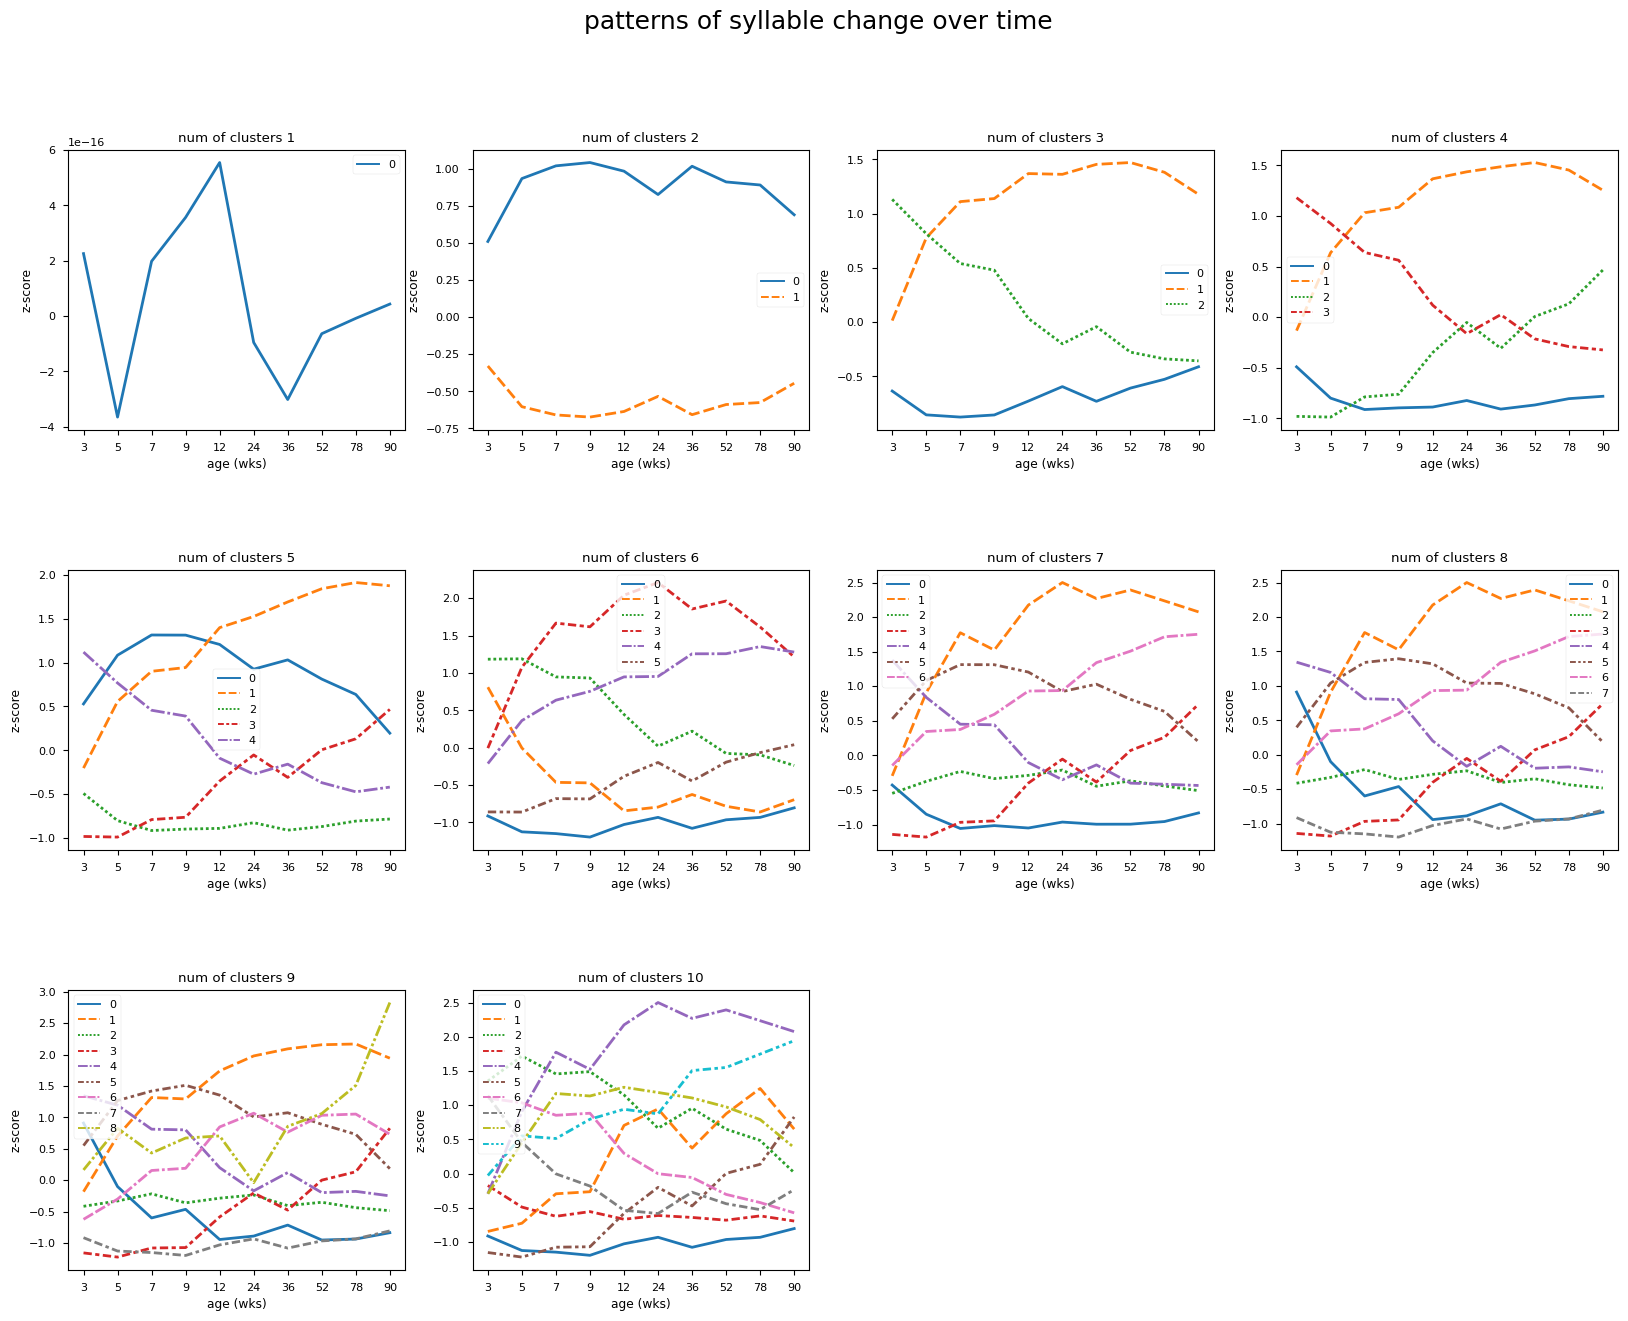

In [80]:
##plot
plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("patterns of syllable change over time", fontsize=18, y=0.95)
n=0
nclust=10
for k in range(1, nclust+1):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit_predict(scaled_features)
    ax = plt.subplot(4, 4, n + 1)
    sns.lineplot(kmeans.cluster_centers_.T, lw=2)
    ax.set_title('num of clusters ' + str(k))
    ax.set_xlabel("age (wks)")
    ax.set_ylabel("z-score")
    ax.set_xticks(range(len(data_labels))) # <--- set the ticks first
    ax.set_xticklabels(data_labels)
    n=n+1

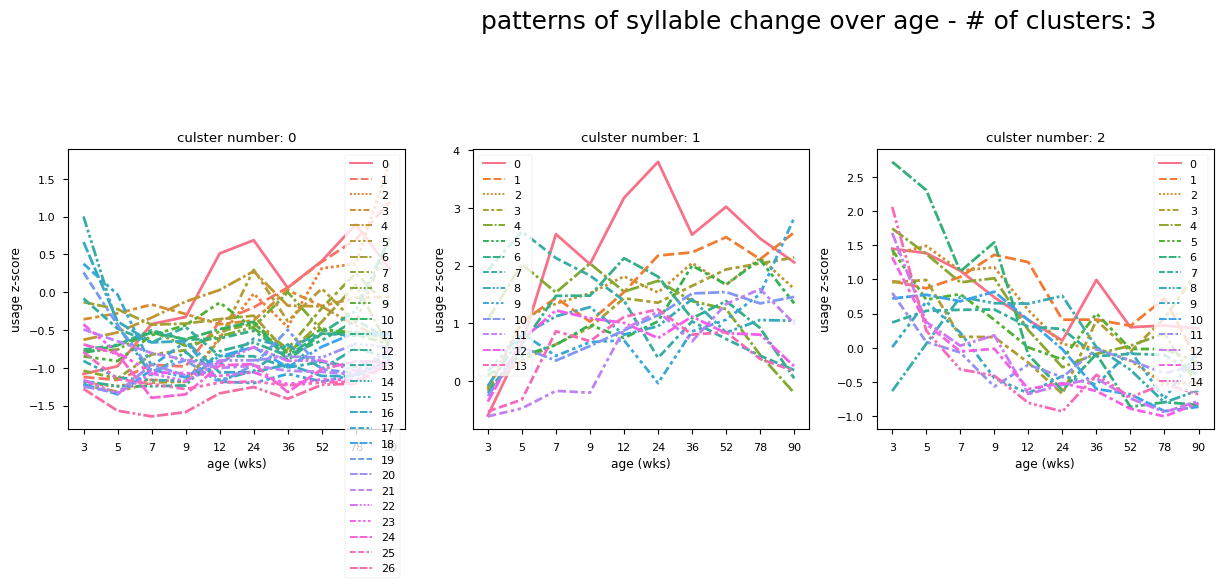

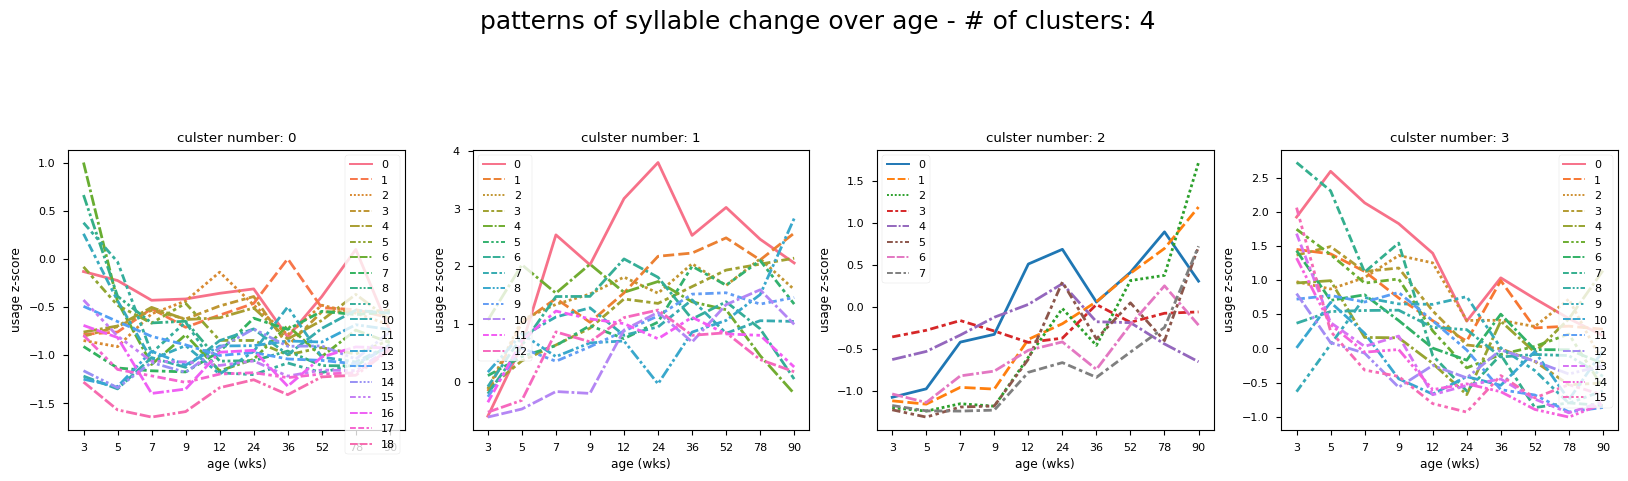

In [81]:
##plot
n=0
nclust=4
for k in range(3, nclust+1):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit_predict(scaled_features)
    clust_labels = kmeans.labels_
    n=0
    plt.figure(figsize=(20, 20))
    plt.subplots_adjust(hspace=0.5)
    plt.suptitle("patterns of syllable change over age - # of clusters: " + str(k), fontsize=18, y=0.95)
    for i in range(k):
        #temp = data_umap[clust_labels==i].T    
        temp = scaled_features[clust_labels==i].T  
        ax = plt.subplot(4, 4, n + 1)
        #ax = plt.subplots(4, 4, sharey=True)
        #sns.lineplot(temp, lw=2)
        sns.lineplot(temp, lw=2,estimator='mean',errorbar='se')
        ax.set_title('culster number: ' + str(i))
        ax.set_xlabel("age (wks)")
        ax.set_ylabel("usage z-score")
        #ax.set_ylim([-1.5,4])
        ax.set_xticks(range(len(data_labels))) # <--- set the ticks first
        ax.set_xticklabels(data_labels)
        n=n+1

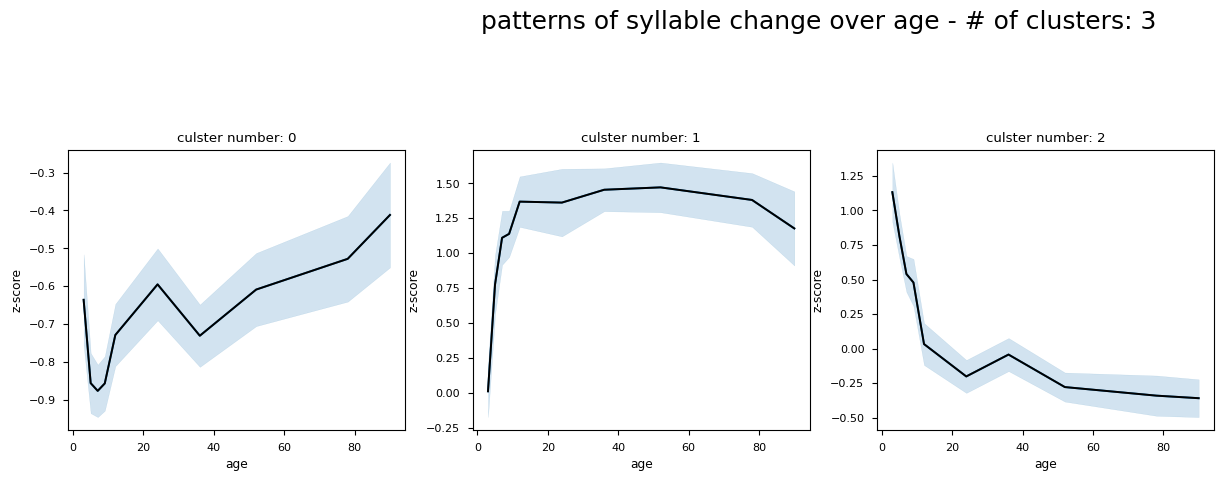

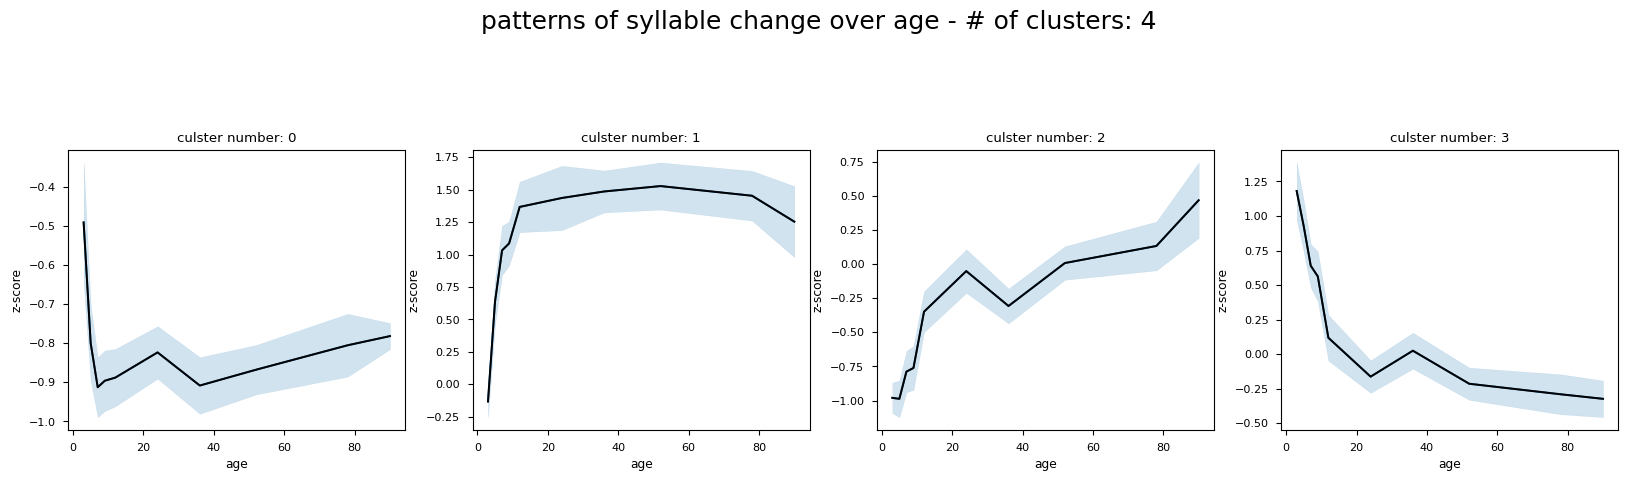

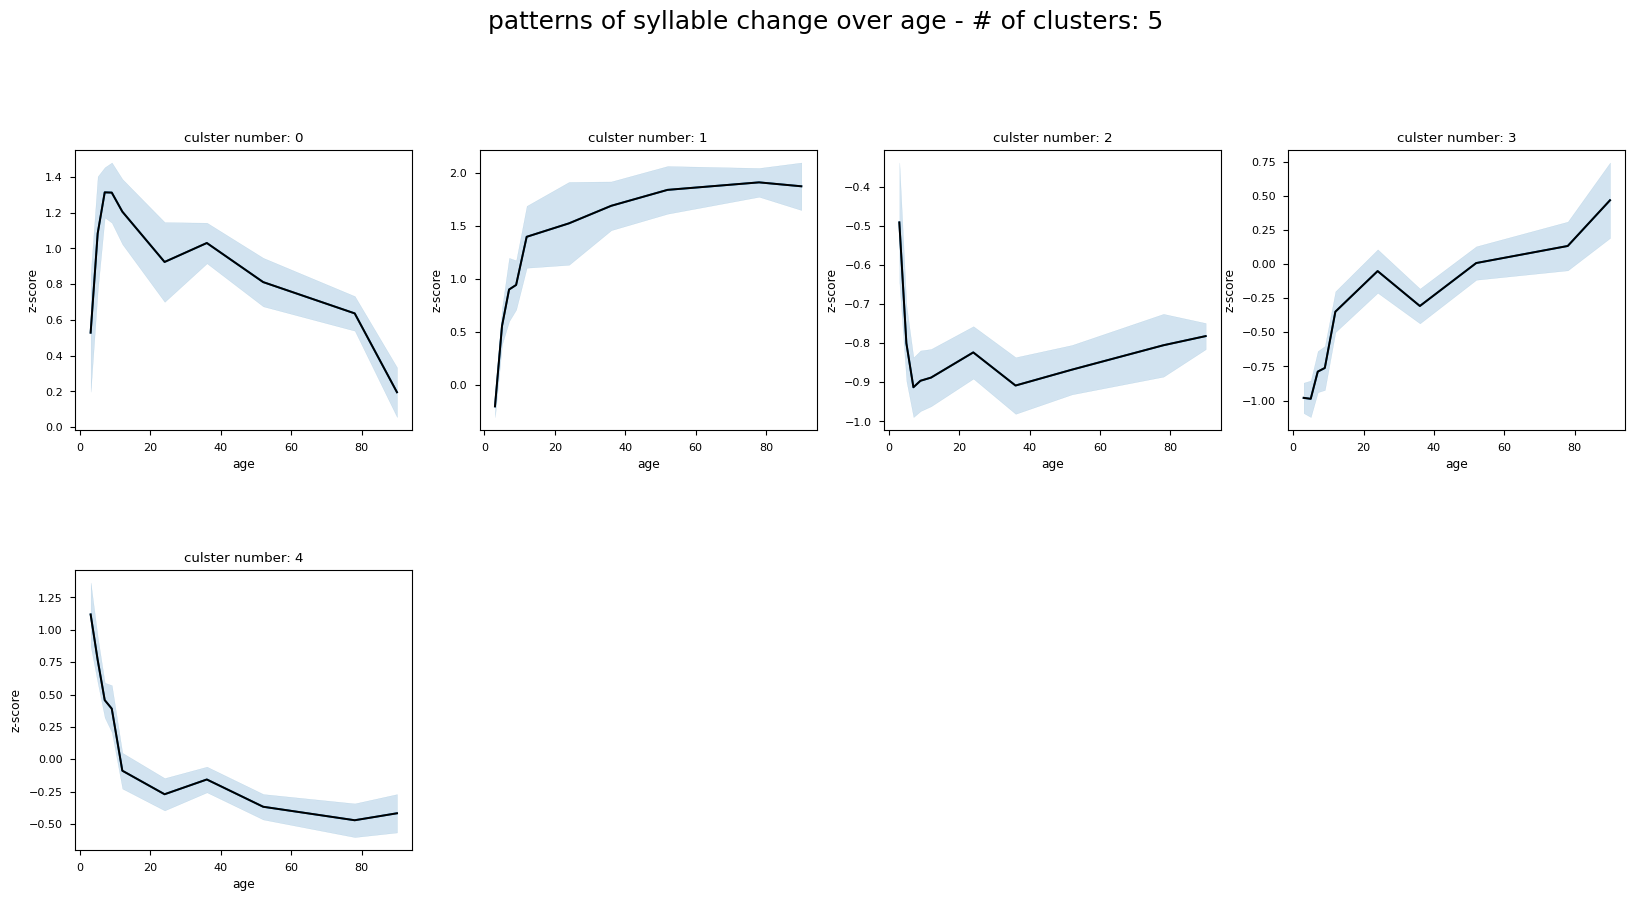

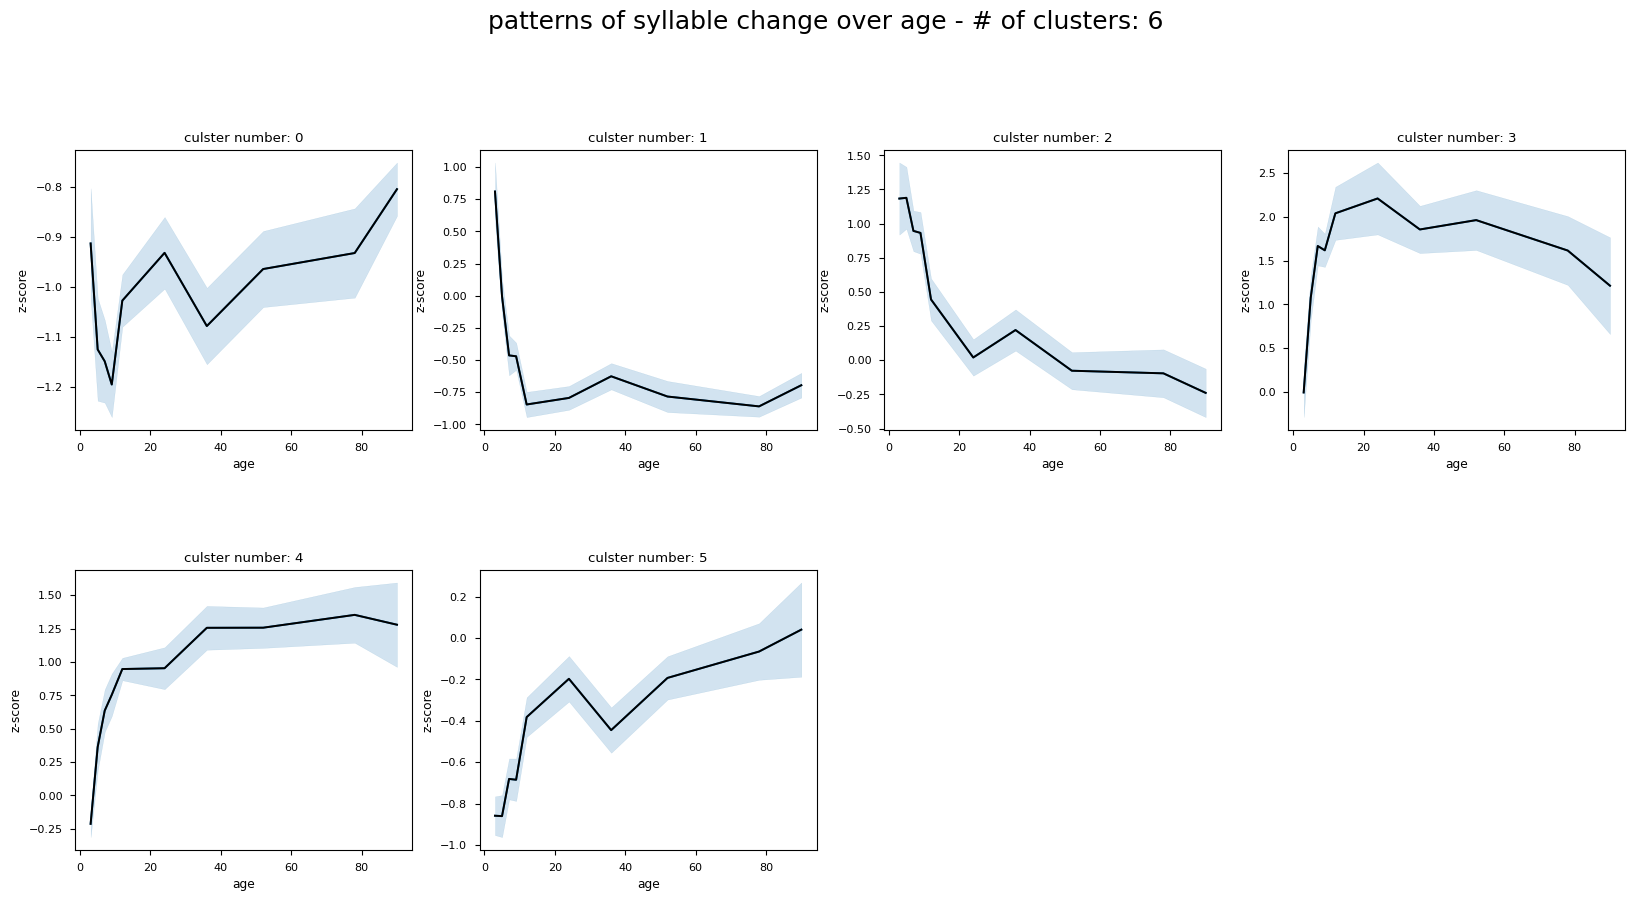

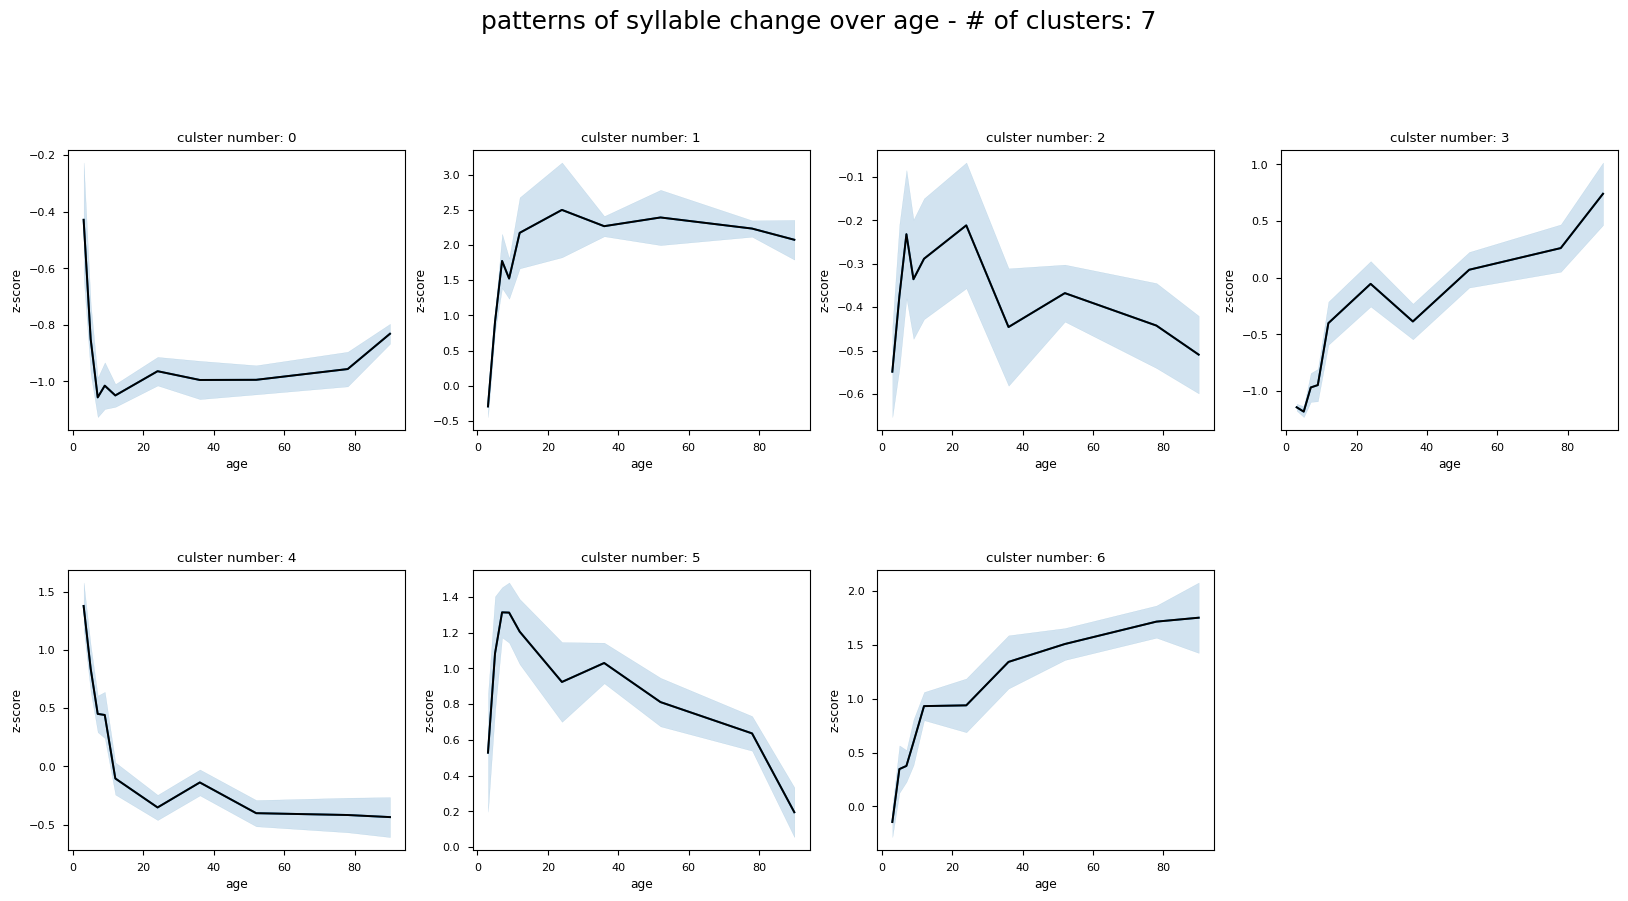

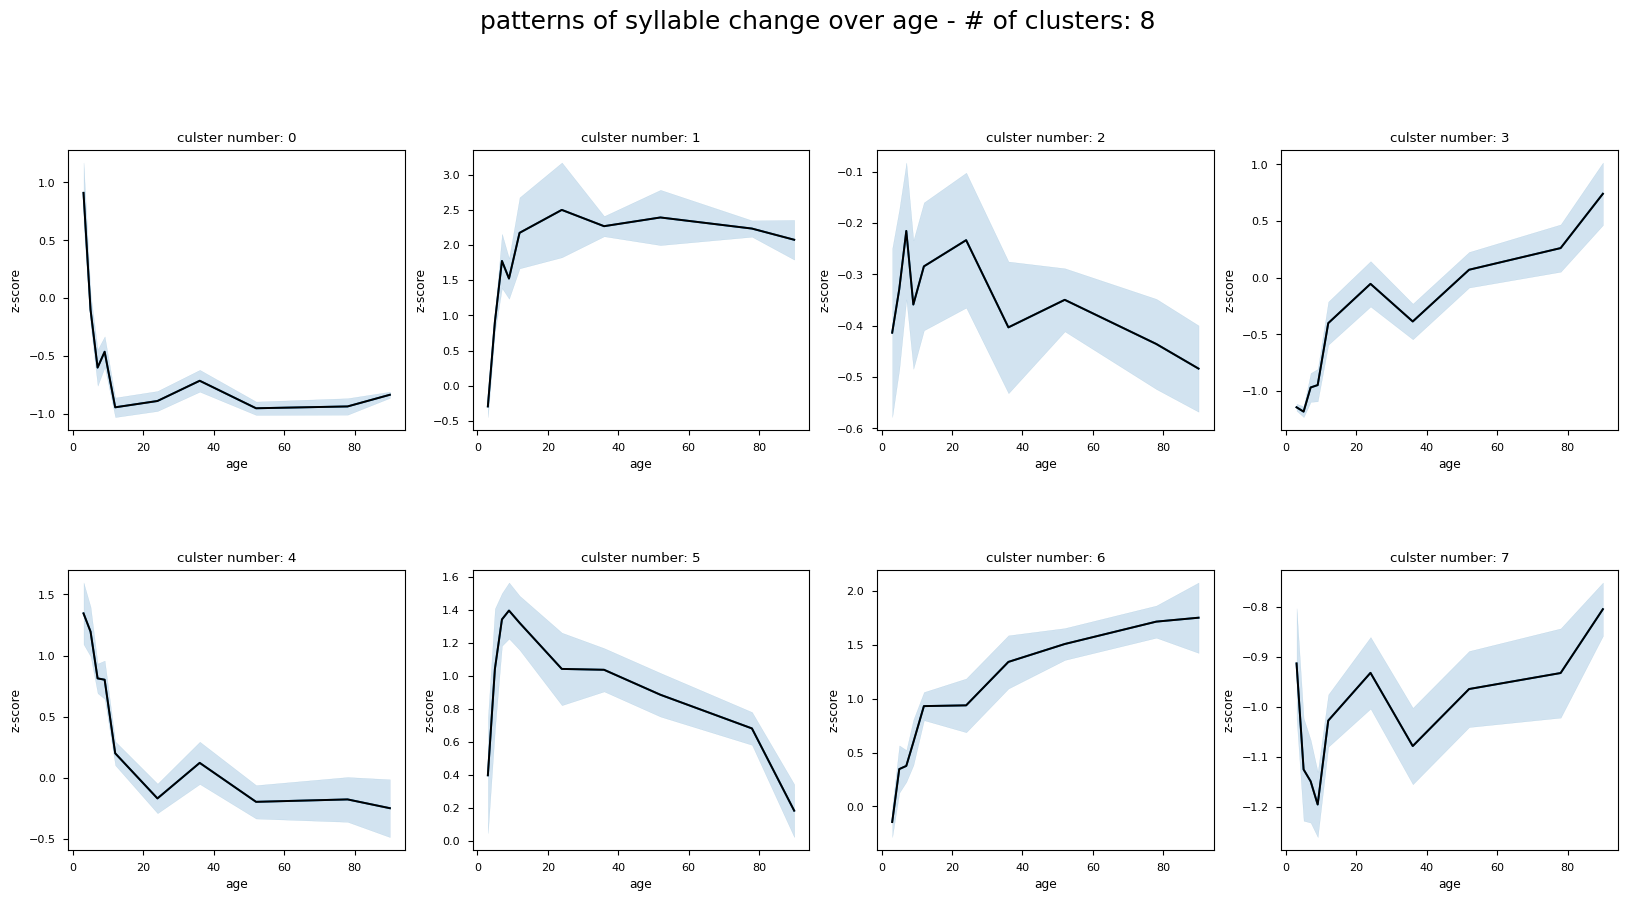

In [100]:
##plot
n=0
nclust=8
for k in range(3, nclust+1):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit_predict(scaled_features)
    clust_labels = kmeans.labels_
    n=0
    plt.figure(figsize=(20, 20))
    plt.subplots_adjust(hspace=0.5)
    plt.suptitle("patterns of syllable change over age - # of clusters: " + str(k), fontsize=18, y=0.95)
    for i in range(k):
        #temp = data_umap[clust_labels==i].T    
        temp = scaled_features[clust_labels==i].T  
        df = pd.DataFrame()
        df['z-score']=temp.T.flatten()
        df['age'] = np.shape(temp)[1] * list(data_labels)
        syll=list(range(np.shape(temp)[1]))
        df['syll'] = [ele for ele in syll for i in range(len(data_labels))]
        ax = plt.subplot(4, 4, n + 1)
        sns.lineplot(data=df, x='age', y='z-score', estimator='mean',errorbar='se')
        sns.lineplot(x=data_labels,y=np.mean(temp, axis=1), c='black')
        ax.set_title('culster number: ' + str(i))
        #ax.set_ylim([-1.5,1.5])
        n=n+1

<Axes: >

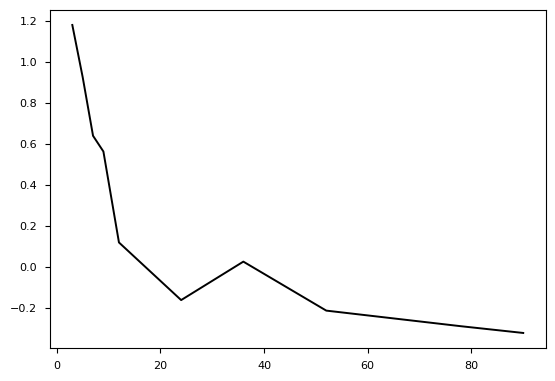

In [89]:
sns.lineplot(x=data_labels,y=np.mean(temp, axis=1), c='black')

In [ ]:
temp = scaled_features[clust_labels==i].T  
df = pd.DataFrame()
df['z-score']=[item for sublist in temp for item in sublist]
df['age'] = np.shape(temp)[1] * list(data_labels)
syll=list(range(np.shape(temp)[1]))
df['syll'] = [ele for ele in syll for i in range(len(data_labels))]

<Axes: xlabel='age', ylabel='z-score'>

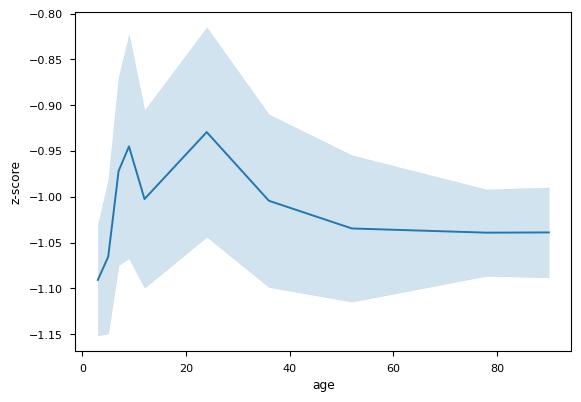

In [66]:
temp = scaled_features[clust_labels==i].T  
df = pd.DataFrame()
df['z-score']=[item for sublist in temp for item in sublist]
df['age'] = np.shape(temp)[1] * list(data_labels)
syll=list(range(np.shape(temp)[1]))
df['syll'] = [ele for ele in syll for i in range(len(data_labels))]
sns.lineplot(data=df, x='age', y='z-score', estimator='mean',errorbar='se')

In [ ]:
# explore number of clusters
kmeans_kwargs = {"init": "random",
                "n_init": 10,
                "max_iter": 300,
                "random_state": 42}

# A list holds the SSE values for each k
sse = []
nclust=16
for k in range(1, nclust+1):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit_predict(scaled_features)
    sse.append(kmeans.inertia_)

#plt.style.use("fivethirtyeight")
plt.plot(range(1, nclust+1), sse)
plt.xticks(range(1, nclust+1))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

# figure out elbow point
kl = KneeLocator(range(1, nclust+1), sse, curve="convex", direction="decreasing")
print('elbow point: ', kl.elbow)

# second method
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, nclust+1):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    #kmeans.fit(scaled_features)
    kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

kl = KneeLocator(range(2, nclust+1), silhouette_coefficients, curve="convex", direction="decreasing")
print('elbow point: ', kl.elbow)

#plt.style.use("seaborn")
plt.plot(range(2, nclust+1), silhouette_coefficients)
plt.xticks(range(2, nclust+1))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()